<a href="https://colab.research.google.com/github/ChauNgocHoang/Chau-Ngoc-Hoang/blob/main/NDMonan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [11]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/monanvietnam/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 974 images belonging to 10 classes.


In [12]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/monanvietnam/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 230 images belonging to 10 classes.


In [13]:
training_set.class_indices

{'banhcuon': 0,
 'banhmi': 1,
 'banhpia': 2,
 'banhtet': 3,
 'banhxeo': 4,
 'bundaumamtom': 5,
 'cakhoto': 6,
 'comtam': 7,
 'nem': 8,
 'pho': 9}

In [14]:
validation.class_indices

{'banhcuon': 0,
 'banhmi': 1,
 'banhpia': 2,
 'banhtet': 3,
 'banhxeo': 4,
 'bundaumamtom': 5,
 'cakhoto': 6,
 'comtam': 7,
 'nem': 8,
 'pho': 9}

In [15]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
31/31 [==============================] - 370s 12s/step - loss: 3.4864 - accuracy: 0.2023 - val_loss: 2.2654 - val_accuracy: 0.1435
Epoch 2/100
31/31 [==============================] - 187s 6s/step - loss: 2.0532 - accuracy: 0.2916 - val_loss: 1.9962 - val_accuracy: 0.2870
Epoch 3/100
31/31 [==============================] - 194s 6s/step - loss: 1.8841 - accuracy: 0.3326 - val_loss: 1.9529 - val_accuracy: 0.3130
Epoch 4/100
31/31 [==============================] - 202s 7s/step - loss: 1.7548 - accuracy: 0.3932 - val_loss: 1.9216 - val_accuracy: 0.3652
Epoch 5/100
31/31 [==============================] - 201s 6s/step - loss: 1.7180 - accuracy: 0.4045 - val_loss: 1.9752 - val_accuracy: 0.3391
Epoch 6/100
31/31 [==============================] - 198s 6s/step - loss: 1.6064 - accuracy: 0.4579 - val_loss: 1.7867 - val_accuracy: 0.3957
Epoch 7/100
31/31 [==============================] - 197s 6s/step - loss: 1.4764 - accuracy: 0.4836 - val_loss: 1.7352 - val_accuracy: 0.4696
Epoch

In [18]:
model.save("Food.h5")

In [19]:
model_CNN=load_model('Food.h5')

1/1 [==============================] - 0s 361ms/step
BANH CUON


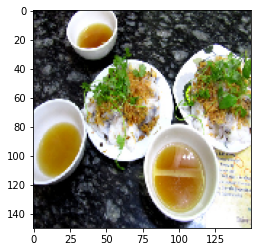

1/1 [==============================] - 0s 61ms/step
BANH TET


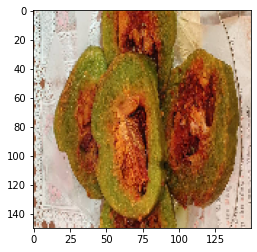

1/1 [==============================] - 0s 77ms/step
BANH MI


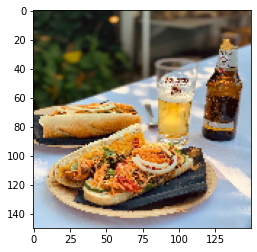

In [21]:
test="/content/drive/MyDrive/monanvietnam/test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='BANH CUON'
  if round(result[0][1])==1:
    prediction='BANH MI'
  if round(result[0][2])==1:
    prediction='BANH PIA'
  if round(result[0][3])==1:
    prediction='BANH TET'
  if round(result[0][4])==1:
    prediction='BANH XEO'
  if round(result[0][5])==1:
    prediction='BUN DAU MAM TOM'
  if round(result[0][6])==1:
    prediction='CA KHO TO'
  if round(result[0][7])==1:
    prediction='COM TAM'
  if round(result[0][8])==1:
    prediction='NEM'
  if round(result[0][9])==1:
    prediction='PHO'
  print(prediction)
  plt.show()